In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
import h5py as h
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
import random
from keras.layers import GaussianNoise

2022-06-06 16:22:10.031868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/aristobot/LHAPDF/lib
2022-06-06 16:22:10.033121: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


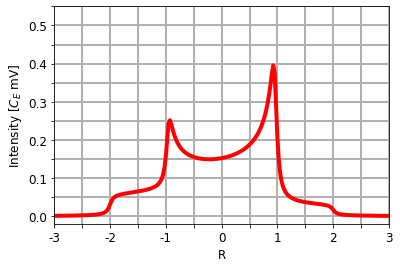

In [2]:
import numpy as np
import matplotlib.pyplot as mp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as font_manager

g = 0.05
s = 0.04
bigy=(3-s)**0.5
labelfontsize = 30

def cosal(x,eps):
    return (1-eps*x-s)/bigxsquare(x,eps)


def c(x):
    return ((g**2+(1-x-s)**2)**0.5)**0.5


def bigxsquare(x,eps):
    return (g**2+(1-eps*x-s)**2)**0.5


def mult_term(x,eps):
    return float(1)/(2*np.pi*np.sqrt(bigxsquare(x,eps)))


def cosaltwo(x,eps):
    return ((1+cosal(x,eps))/2)**0.5


def sinaltwo(x,eps):
    return ((1-cosal(x,eps))/2)**0.5


def termone(x,eps):
    return np.pi/2+np.arctan((bigy**2-bigxsquare(x,eps))/((2*bigy*(bigxsquare(x,eps))**0.5)*sinaltwo(x,eps)))


def termtwo(x,eps):
    return np.log((bigy**2+bigxsquare(x,eps)+2*bigy*(bigxsquare(x,eps)**0.5)*cosaltwo(x,eps))/(bigy**2+bigxsquare(x,eps)-2*bigy*(bigxsquare(x,eps)**0.5)*cosaltwo(x,eps)))

def icurve(x,eps):
    return mult_term(x,eps)*(2*cosaltwo(x,eps)*termone(x,eps)+sinaltwo(x,eps)*termtwo(x,eps))

xvals = np.linspace(-6,6,500)
yvals = icurve(xvals,1)/10
yvals2 = icurve(-xvals,1)/10

minor_ticks_x = np.arange(-3,3.5,0.5)
minor_ticks_y = np.arange(0,0.6,0.05)
fig = mp.figure()
ax = fig.add_subplot(1, 1, 1)

axisFontSize = 12
titleFontSize = 12
legendFontSize = 12

font = font_manager.FontProperties(family='serif',size=legendFontSize)
mp.plot(xvals, yvals+0.5*yvals2, "r",linewidth = 4)
# mp.plot(xvals, yvals, "g",linewidth = 4)
# mp.plot(xvals, 0.5*yvals2, "b",linewidth = 4)
mp.xlabel('R', fontsize=axisFontSize)
mp.ylabel('Intensity [$C_{E}$ mV]', fontsize=axisFontSize)
mp.grid(True, which='both', axis='both', linewidth=2)
mp.xticks(minor_ticks_x, fontsize=axisFontSize)
mp.yticks(minor_ticks_y, fontsize=axisFontSize)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
mp.xlim(-3, 3)
ax.set_axisbelow(True)

fig = mp.gcf()
# fig.set_size_inches(16, 16)
plt.show()

In [3]:
P = .15
r = (np.sqrt(4-3*P**(2))+P)/(2-2*P)
print(r)

1.2547371773559965


In [4]:
center = 250
length = range(501)
norm_array = []
for x in length:
    norm_array = np.append(norm_array,(x - center)*(12/500))  
Iplus = icurve(norm_array,1)
Iminus = icurve(norm_array,-1)
ratio = Iminus/Iplus
polar = []
for i in length:
    polar = np.append(polar,.8)

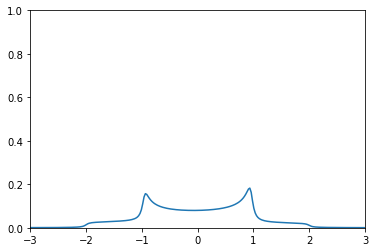

In [5]:
### Polarization ###
array = r*Iminus
array_flipped = np.flip(array)
element_1 = array_flipped+Iminus
sum_array = np.sum(array_flipped)*(12/500)
element_2 = 1/sum_array
element_3 = P
result = element_1*element_2*element_3
plt.plot(norm_array,result)
plt.ylim(0,1)
plt.xlim(-3,3)
df = pd.DataFrame({'R':result})
# df_T = df.T
# df_T.to_csv("Sample_Data.csv",index=False)

In [6]:
# R_arr = []
# P_arr = []
# for x in range(0,100):
#     P = random.uniform(0,1)
#     r = (np.sqrt(4-3*P**(2))+P)/(2-2*P)
#     Iminus = icurve(norm_array,-1)
#     array = r*Iminus
#     array_flipped = np.flip(array)
#     element_1 = array_flipped+Iminus
#     sum_array = np.sum(array_flipped)*(12/500)
#     element_2 = 1/sum_array
#     element_3 = P
#     result = element_1*element_2*element_3
#     R_arr.append(result)
#     df = pd.DataFrame(R_arr)
#     P_arr.append(P)
# df['P'] = P_arr
# df

In [6]:
R_arr = []
P_arr = []
for x in range(0,500):
    P = random.uniform(0,1)
    r = (np.sqrt(4-3*P**(2))+P)/(2-2*P)
    Iminus = icurve(norm_array,-1)
    array = r*Iminus
    array_flipped = np.flip(array)
    element_1 = array_flipped+Iminus
    sum_array = np.sum(array_flipped)*(12/500)
    element_2 = 1/sum_array
    element_3 = P
    noise = np.random.normal(0,1)
    result = element_1*element_2*element_3
    R_arr.append(result)
    df = pd.DataFrame(R_arr)
    P_arr.append(P)
df['P'] = P_arr
df

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,P
0,0.000335,0.000338,0.000341,0.000344,0.000347,0.000350,0.000353,0.000357,0.000360,0.000363,...,0.000355,0.000351,0.000348,0.000345,0.000342,0.000339,0.000336,0.000334,0.000331,0.482672
1,0.000353,0.000356,0.000359,0.000362,0.000365,0.000369,0.000372,0.000375,0.000379,0.000382,...,0.000372,0.000369,0.000366,0.000363,0.000360,0.000357,0.000353,0.000350,0.000347,0.519159
2,0.000284,0.000286,0.000289,0.000291,0.000294,0.000297,0.000299,0.000302,0.000305,0.000307,...,0.000301,0.000298,0.000296,0.000293,0.000291,0.000288,0.000286,0.000283,0.000281,0.384720
3,0.000204,0.000206,0.000208,0.000210,0.000212,0.000214,0.000215,0.000217,0.000219,0.000221,...,0.000218,0.000216,0.000214,0.000212,0.000210,0.000208,0.000207,0.000205,0.000203,0.255625
4,0.000294,0.000297,0.000299,0.000302,0.000304,0.000307,0.000310,0.000313,0.000315,0.000318,...,0.000312,0.000309,0.000306,0.000303,0.000301,0.000298,0.000296,0.000293,0.000291,0.402996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000027,0.000028,0.000028,0.000028,0.000028,0.000029,0.000029,0.000029,0.000029,0.000030,...,0.000029,0.000029,0.000029,0.000029,0.000028,0.000028,0.000028,0.000028,0.000027,0.029501
496,0.000181,0.000183,0.000184,0.000186,0.000188,0.000189,0.000191,0.000193,0.000194,0.000196,...,0.000193,0.000191,0.000190,0.000188,0.000187,0.000185,0.000183,0.000182,0.000180,0.221773
497,0.000451,0.000455,0.000459,0.000463,0.000467,0.000471,0.000475,0.000480,0.000484,0.000488,...,0.000471,0.000467,0.000463,0.000459,0.000455,0.000451,0.000447,0.000443,0.000440,0.786156
498,0.000379,0.000383,0.000386,0.000389,0.000393,0.000396,0.000400,0.000403,0.000407,0.000411,...,0.000400,0.000396,0.000393,0.000389,0.000386,0.000383,0.000379,0.000376,0.000373,0.579101


In [26]:
def split_data(X, y, split=0):
    temp = np.random.choice(list(range(len(y))), size=int(len(y)*split), replace=False)
    
    tst_X = pd.DataFrame.from_dict({k: v[temp] for k,v in X.items()})
    trn_X = pd.DataFrame.from_dict({k: v.drop(temp) for k,v in X.items()})
    
    tst_y = y[temp]
    trn_y = y.drop(temp)
    
#     tst_err = err[tstidxs]
#     trn_err = np.delete(err, tstidxs)
    
    return trn_X, tst_X, trn_y, tst_y

y = df['P']
x = df.drop(['P'],axis=1)
train_X, test_X, train_y, test_y = split_data(x,y)

In [27]:
def create_model():
    input = tf.keras.Input(shape=(501))
#     noise = tf.keras.layers.GaussianNoise(0.1)(input)
    layer1 = tf.keras.layers.Dense(256, activation = 'relu',activity_regularizer=regularizers.L2(10**(-10)))(input)
#     noise = tf.keras.layers.GaussianNoise(0.1)(layer1)
#     drop1 = tf.keras.layers.Dropout(.15)(layer1)
    layer2 = tf.keras.layers.Dense(256, activation = 'relu',activity_regularizer=regularizers.L2(10**(-10)))(layer1)
#     drop2 = tf.keras.layers.Dropout(.15)(layer2)
    layer3 = tf.keras.layers.Dense(256, activation = 'relu',activity_regularizer=regularizers.L2(10**(-10)))(layer2)
    output = tf.keras.layers.Dense(1,activation='sigmoid',activity_regularizer=regularizers.L2(10**(-10)))(layer3)
    model = tf.keras.Model(inputs=[input], outputs=output, name="testmodel")
    model.compile(optimizer = tf.keras.optimizers.Adam(.005),
                        loss = tf.keras.losses.MeanSquaredError())
    return model

In [28]:
model_test = create_model()
model_test.summary()

Model: "testmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 501)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               128512    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 260,353
Trainable params: 260,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=5, mode='auto')

In [30]:
fitted_data = model_test.fit(train_X,train_y, validation_data = (test_X, test_y), epochs = 100,callbacks=[reduce_lr],batch_size=30)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.0453 - lr: 0.0050
Epoch 2/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0065 - lr: 0.0050
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0010 - lr: 0.0050
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 2.7531e-04 - lr: 0.0050
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 1.5809e-04 - lr: 0.0050
Epoch 6/100
17/17 [==============================] - 0s 11ms/step - loss: 1.5722e-04 - lr: 0.0050
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.1573e-04 - lr: 0.0050
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 8.7720e-05 - lr: 0.0050
Epoch 9/100
17/17 [==============================] - 0s 9ms/step - loss: 8.1448e-05 - lr: 0.0050
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 7.1487e-05 - lr: 0.0050
Epoch 11/100
17/17 [==================

17/17 [==============================] - 0s 10ms/step - loss: 4.9744e-05 - lr: 5.0000e-17
Epoch 82/100
17/17 [==============================] - 0s 8ms/step - loss: 4.9744e-05 - lr: 5.0000e-17
Epoch 83/100
17/17 [==============================] - 0s 11ms/step - loss: 4.9744e-05 - lr: 5.0000e-17
Epoch 84/100
17/17 [==============================] - 0s 12ms/step - loss: 4.9744e-05 - lr: 5.0000e-17
Epoch 85/100
17/17 [==============================] - 0s 11ms/step - loss: 4.9744e-05 - lr: 5.0000e-18
Epoch 86/100
17/17 [==============================] - 0s 14ms/step - loss: 4.9744e-05 - lr: 5.0000e-18
Epoch 87/100
17/17 [==============================] - 0s 12ms/step - loss: 4.9744e-05 - lr: 5.0000e-18
Epoch 88/100
17/17 [==============================] - 0s 11ms/step - loss: 4.9744e-05 - lr: 5.0000e-18
Epoch 89/100
17/17 [==============================] - 0s 9ms/step - loss: 4.9744e-05 - lr: 5.0000e-18
Epoch 90/100
17/17 [==============================] - 0s 10ms/step - loss: 4.9744e-05 - 

In [31]:
model_test.save('trained_model_Noise_v2.h5', save_format='h5')

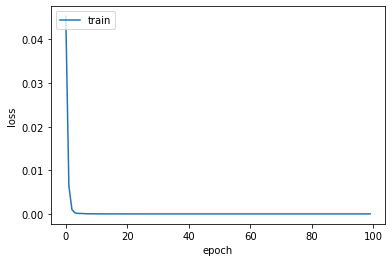

In [32]:
plt.plot(fitted_data.history['loss'])
# plt.plot(fitted_data.history['val_loss'])
# plt.title('model loss w/ 1000 epochs, learning rate of 0.000002')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# plt.savefig('trained_model_1.jpeg')
plt.show()

In [33]:
testmodel = tf.keras.models.load_model('trained_model_Noise_v2.h5')

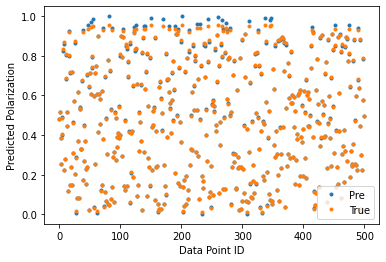

In [34]:
X = train_X
Y = testmodel.predict(X)
P = np.array(P_arr)
Y = Y.reshape((500,))
result = pd.DataFrame(Y)
result = result.rename(columns={df.columns[0]:'P'})
Accuracy = ((P_arr - Y)/P_arr)
# result['Err'] = pd.DataFrame(Accuracy).abs()
result['P_True'] = P_arr
# plt.errorbar(np.arange(len(result['P'])),
#              result['P'],
#              yerr=result['Err'],label="Pre",fmt='.')

# plt.plot(np.arange(len(result['P'])),result['P'],'.')
# plt.xlabel('Data Point ID')
# plt.ylabel('Predicted Polarization')
plt.plot(np.arange(len(result['P_True'])),result['P_True'],'.',label = 'True')
plt.plot(np.arange(len(result['P'])),result['P'],'.')
plt.xlabel('Data Point ID')
plt.ylabel('Predicted Polarization')
plt.legend(['Pre','True'])
# plt.savefig("NN_Example.jpeg")

Text(0, 0.5, 'Polarization')

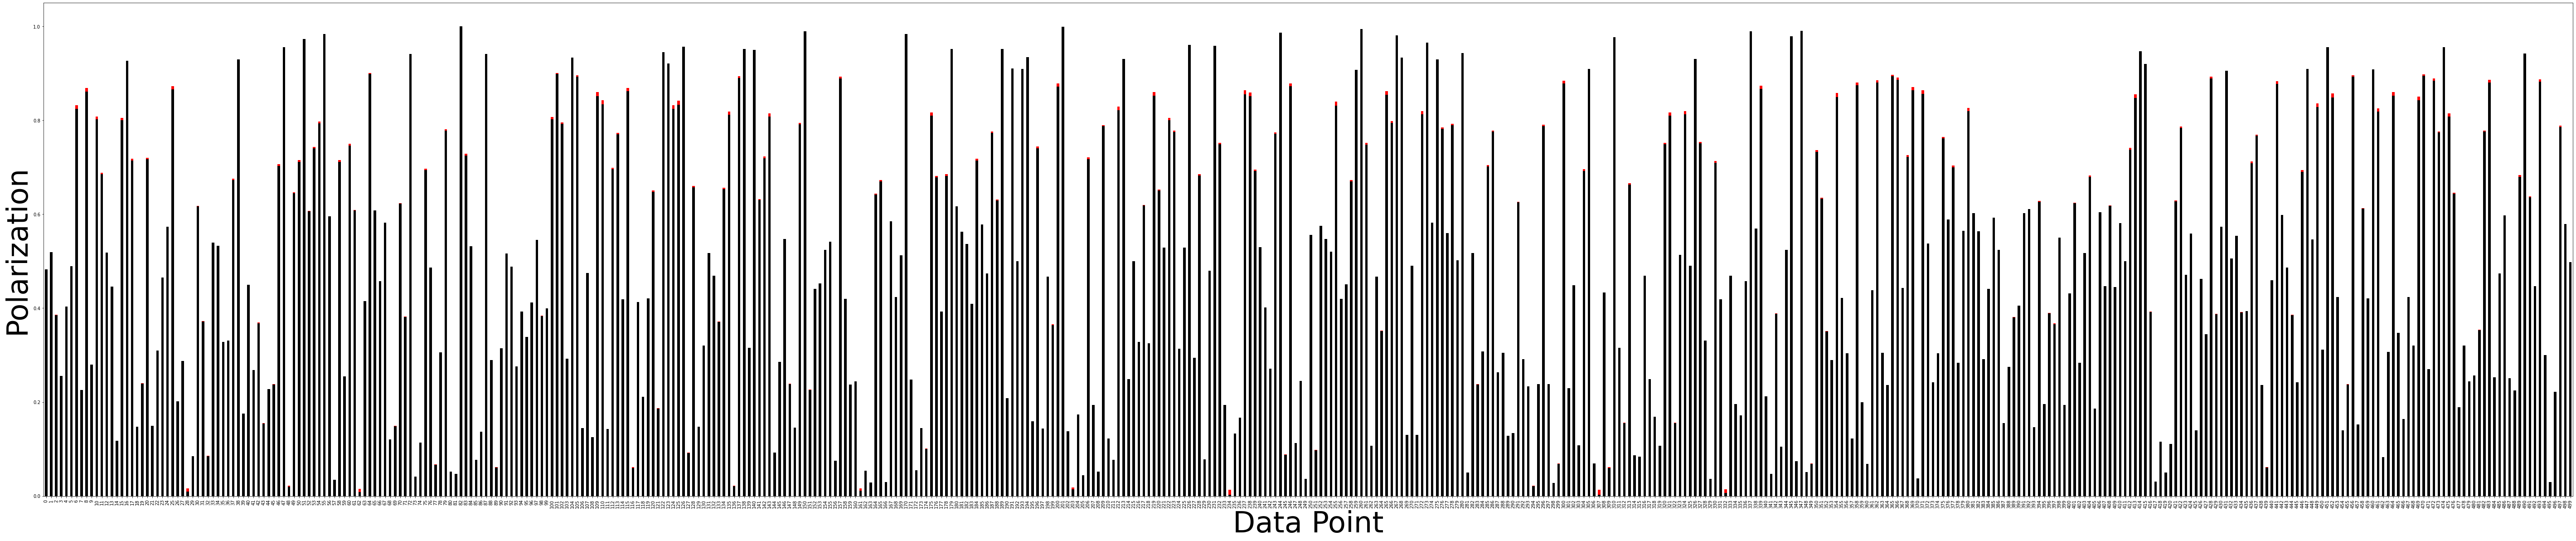

In [35]:
result['P'].plot.bar(figsize=(100,20),alpha=1,color='red',label='Predicted')
result['P_True'].plot.bar(figsize=(100,20),alpha=1,color='black',label='True')
plt.xlabel('Data Point',fontsize=64)
plt.ylabel('Polarization',fontsize=64)
# plt.xticks(fontsize=32)

Text(0.5, 1.0, 'Data Point ID: 0 - 100')

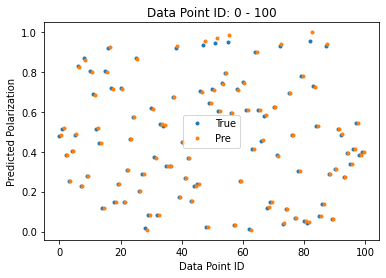

In [36]:
# df_mask = result['Err'] < 1
# filt = result[df_mask]
filt = result
upper_lim = 100
lower_lim = 0
plt.plot(np.arange(len(filt['P'][lower_lim:upper_lim])),filt['P'][lower_lim:upper_lim],'.',label="Pre")
plt.xlabel('Data Point ID')
plt.ylabel('Predicted Polarization')
plt.plot(np.arange(len(result['P_True'][lower_lim:upper_lim])) + .5,result['P_True'][lower_lim:upper_lim],'.',label = 'True')
plt.legend(['True','Pre'])
plt.title('Data Point ID: 0 - 100')
# plt.savefig('Plots/NN_Example_1.jpeg')